In [4]:
import os
import scanpy as sc
import diopy
new_directory = "~/DSCT/src/"
os.chdir(new_directory)
import DSCT_load
import DSCT_train

In [ ]:
### Tutorial: Human Cortex
# sc_CTX_human:(https://www.dropbox.com/scl/fi/3nl2fmclkdray82z1mxr4/sc_anno_CTX_human.h5ad?rlkey=ouwtemwux3onf68otq95f2xrb&st=70xle7n1&dl=0)
# st_CTX_human:(https://www.dropbox.com/scl/fi/700g03o7jmz27nurvoih2/CTX_merfish_human.h5?rlkey=41i3qdm6pv82awwx7cgnnrutu&dl=0)


In [5]:

#data
sc_data=sc.read_h5ad('~/sc_anno_CTX_human.h5ad')
st_data=sc.read_h5ad('~/CTX_human.h5ad')

/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
import time


use_select=True
gene_number2=120
anno="Subclass"
train_num=350


num_classes = len(set(sc_data.obs[anno]))
result_save_path="~/"
model_save_path="~/"
plot_save_path="~/"

print("start")
#start time
start_time = time.time()
sc_data,st_data=DSCT_load.fmap_load(sc_data,st_data,anno,gene_number2,use_select)
DSCT_train.fmap_train(sc_data,st_data,result_save_path,model_save_path,plot_save_path,train_num,num_classes,anno)
end_time = time.time()
time_diff = end_time-start_time
print("total time")
print(time_diff)
#end time


start


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/cosg/cosg.py:115: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


**finished identifying marker genes by COSG**


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:48: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_data.obs["type_integer"] = cell_types_integer


Epoch [10/350], Loss: 0.2161
Epoch [20/350], Loss: 0.0759
Epoch [30/350], Loss: 0.0487
Epoch [40/350], Loss: 0.0353
Epoch [50/350], Loss: 0.0270
Epoch [60/350], Loss: 0.0224
Epoch [70/350], Loss: 0.0197
Epoch [80/350], Loss: 0.0167
Epoch [90/350], Loss: 0.0148
Epoch [100/350], Loss: 0.0130
Epoch [110/350], Loss: 0.0116
Epoch [120/350], Loss: 0.0105
Epoch [130/350], Loss: 0.0096
Epoch [140/350], Loss: 0.0088
Epoch [150/350], Loss: 0.0081
Epoch [160/350], Loss: 0.0075
Epoch [170/350], Loss: 0.0069
Epoch [180/350], Loss: 0.0064
Epoch [190/350], Loss: 0.0060
Epoch [200/350], Loss: 0.0056
Epoch [210/350], Loss: 0.0052
Epoch [220/350], Loss: 0.0049
Epoch [230/350], Loss: 0.0046
Epoch [240/350], Loss: 0.0043
Epoch [250/350], Loss: 0.0040
Epoch [260/350], Loss: 0.0037
Epoch [270/350], Loss: 0.0035
Epoch [280/350], Loss: 0.0033
Epoch [290/350], Loss: 0.0031
Epoch [300/350], Loss: 0.0029
Epoch [310/350], Loss: 0.0027
Epoch [320/350], Loss: 0.0026
Epoch [330/350], Loss: 0.0024
Epoch [340/350], Lo

/data/xyh_desktop/github/DSCT/src/DSCT_train.py:147: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  st_data.obs['predicted_classes'] = predicted_labels


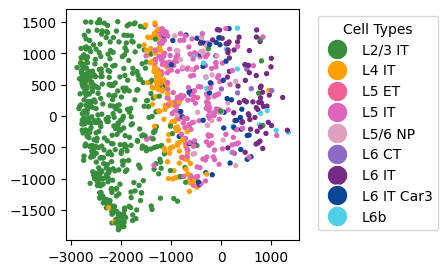

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

coor_x = st_data.obs['imagerow']
coor_y = st_data.obs['imagecol']
predicted_labels = st_data.obs['predicted_classes']

cell_type_to_color = {

    'L2/3 IT': "#388E3C", 
    'L4 IT': "#FFA000",    
    'L5 ET': "#F06292",    
    'L5 IT': "#DF65BA",   
    'L5/6 NP': "#DF9FBF",  
    'L6 CT': "#8D6AC6",    
    'L6 IT': "#762A83",    
    'L6 IT Car3': "#084594", 
    'L6b': "#4DD0E6"       
}


colors = [cell_type_to_color[label] for label in predicted_labels]

fig, ax = plt.subplots(figsize=(3, 3))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=8)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, 
                          markerfacecolor=color, markersize=15) 
                   for cell_type, color in cell_type_to_color.items()]
ax.legend(handles=legend_elements, title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
